In [0]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import statistics 

In [0]:
def create_network(n=8):
  adj_mat = np.zeros((n,n),dtype = int)
  for i in range(n):
    for j in range(n):
      if i == j:
        adj_mat[i][j] = 0
      else:
        adj_mat[i][j] = rd.randint(1,10)
  return adj_mat

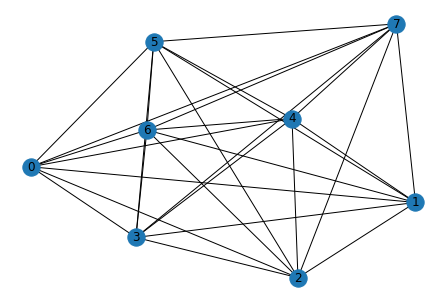

In [13]:
a = create_network()
G = nx.from_numpy_matrix(a) 
nx.draw(G, with_labels=True,)

In [14]:
import itertools
# finding best sequence using brute force starting node is 0
a = list(itertools.permutations([1,2,3,4,5,6,7], 7))
timeList = []
def call_time(a):
  time = G[0][a[0]]['weight']
  for i in range(len(a)-1):
    time+=G[a[i]][a[i+1]]['weight']
  return time
b = list(map(call_time,a))
print(min(b))
print(a[b.index(min(b))])

19
(7, 3, 1, 5, 2, 4, 6)


In [0]:
# Functions for genetic algorithm
def cal_time(rout,G):
  '''Calculate time required to 
  complete the given sequence'''
  time = 0
  flag = 0
  for i in range(len(rout)-1):
    time+= G[rout[i]][rout[i+1]]['weight']
  return time

def cross(pop):
  '''Cross between two parents to generate an offspring'''
  theL = list(range(1,8)) # change the number 8 when genome size is different
  baby = [0]
  a = rd.choice(pop[:int(len(pop)/2)])
  b = rd.choice(pop[int(len(pop)/2):])
  for i,j in zip(a[1:],b[1:]):
    a1 = [i,j]
    if rd.random() < 0.65:  # parent gene selection probability to be fine tuned
      b1 = i
    else:
      b1 = j
    if b1 in baby:
      a1.remove(b1)
      if a1[0] in baby:
        taking =  rd.choice(theL)
        baby.append(taking)
        theL.remove(taking)
      else:
        baby.append(a1[0])
        theL.remove(a1[0])

    else:

      baby.append(b1)
      theL.remove(b1)
  return baby

def mutate(a):
  '''Mutation of a given genome'''
  if rd.random() <0.55: # mutation probability to be fine tuned
      a1 = rd.choice(a[1:])
      a2 = rd.choice(a[1:])
      if a1==a2:
        return a
      else:
        a[a.index(a1)] = a2
        a[a.index(a2)] = a1
        return a
  else:
    return a

def gen_pop(size,start):
  '''Initial generation of population'''
  # size is genome size
  a = [i for i in range(size)]
  a.remove(start)
  baby = [start]
  for i in range(size-1):
    b = rd.choice(a)
    a.remove(b)
    baby.append(b)
  return baby

def stopping_condition(gen_list):
  a = gen_list[len(gen_list)-5:]
  std = statistics.stdev(a)
  if std<0.05:  # std value to fine tuned
    return 1
  else:
    return 0



In [0]:
POPULATION = 100
pop = list()
gen_results = list()
gen_best = list()
for i in range(POPULATION):
  pop.append(gen_pop(8,0))

for i in range(6):
  val = list(map(lambda x: cal_time(x,G),pop))
  gen_results.append(min(val))
  gen_best.append(pop[val.index(min(val))])
  pop = [x for _, x in sorted(zip(val,pop))]
  pop = pop[:90]
  pop = [cross(pop) for i in range(POPULATION)]
  pop = list(map(mutate,pop))

i = 0
while((stopping_condition(gen_results) == 0) and (i<100)):
  val = list(map(lambda x: cal_time(x,G),pop))
  gen_results.append(min(val))
  gen_best.append(pop[val.index(min(val))])
  pop = [x for _, x in sorted(zip(val,pop))]
  pop = pop[:90]
  pop = [cross(pop) for i in range(POPULATION)]
  pop = list(map(mutate,pop))
  i+=1

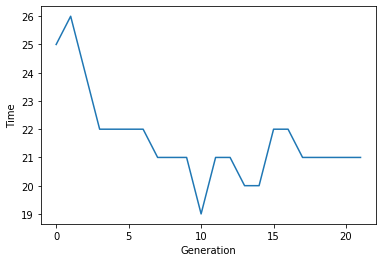

In [57]:
plt.plot(list(range(len(gen_results))),gen_results)
plt.xlabel('Generation')
plt.ylabel('Time')
plt.show()

In [58]:
min(gen_results)

19

In [59]:
gen_best[gen_results.index(min(gen_results))]

[0, 7, 3, 1, 5, 2, 4, 6]